In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

%matplotlib inline

In [3]:
#Look at advertising data. This data has sales in thousands of dollars based on thousands spend on advertising
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


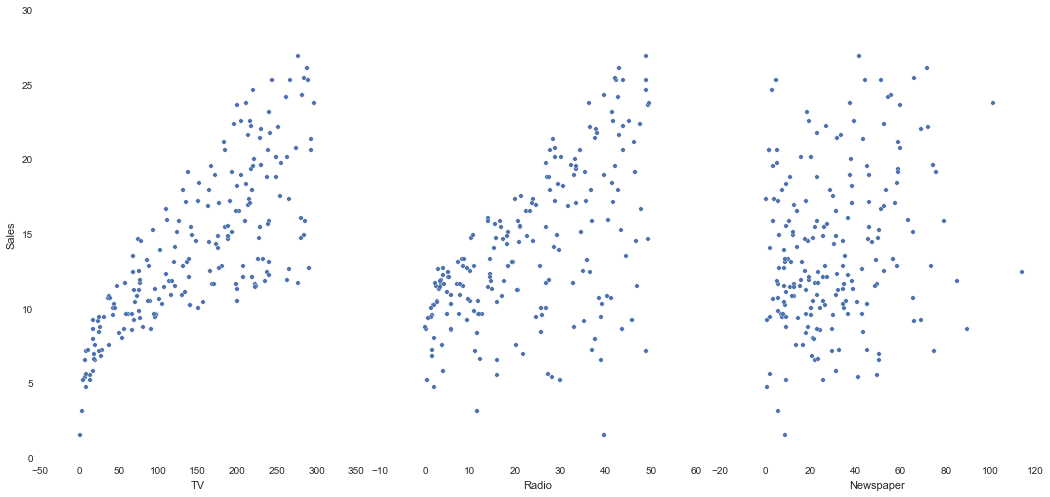

In [4]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

In [6]:
## STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
print lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64


In [7]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print lm2.intercept_
print lm2.coef_

7.03259354913
[ 0.04753664]


In [8]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(X_new)

array([ 9.40942557])

In [9]:
### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict(50)

array([ 9.40942557])

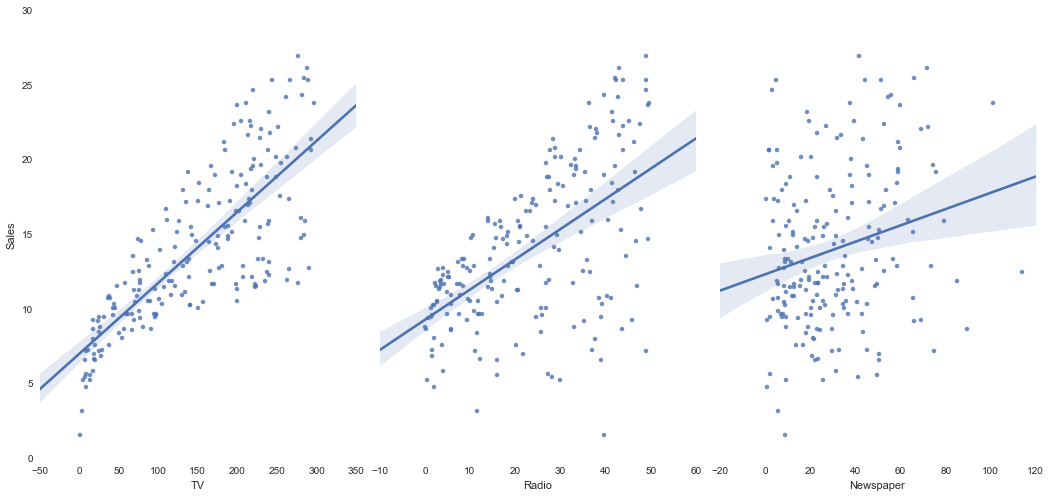

In [10]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [11]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [12]:
### STATSMODELS ###

# print the p-values for the model coefficients
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [13]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.61187505085007099

In [14]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
lm2.score(X, y)

0.61187505085007121

In [15]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm1.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [16]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print lm2.intercept_
print lm2.coef_

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [17]:
# pair the feature names with the coefficients
zip(feature_cols, lm2.coef_)

[('TV', 0.045764645455397622),
 ('Radio', 0.18853001691820459),
 ('Newspaper', -0.0010374930424762244)]

In [18]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 04 Jun 2015   Prob (F-statistic):           1.58e-96
Time:                        20:38:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================
"""

In [19]:
### STATSMODELS ###

# only include TV and Radio in the model
lm1 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm1.rsquared

0.89719426108289557

In [20]:
# add Newspaper to the model (which we believe has no association with Sales)
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm1.rsquared

0.89721063817895219

In [21]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print metrics.mean_absolute_error(y_true, y_pred)
print metrics.mean_squared_error(y_true, y_pred)
print np.sqrt(metrics.mean_squared_error(y_true, y_pred))

10.0
150.0
12.2474487139


In [22]:
# include Newspaper
X = data[['TV', 'Radio', 'Newspaper']]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.40465142303


In [23]:
# exclude Newspaper
X = data[['TV', 'Radio']]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.38790346994


In [31]:
# Categorical Variables
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [25]:
# create a new Series called Size_large
data['Size_large'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [28]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print coefficients
zip(feature_cols, lm2.coef_)

[('TV', 0.045719820924362803),
 ('Radio', 0.1887281431342788),
 ('Newspaper', -0.0010976794483516308),
 ('Size_large', 0.05742385085482777)]

In [30]:
# Categorical Features with more than two categories 
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [32]:
# create three dummy variables using get_dummies
pd.get_dummies(data.Area, prefix='Area').head()

,Area_rural,Area_suburban,Area_urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


In [33]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


In [34]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [35]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
zip(feature_cols, lm2.coef_)

[('TV', 0.04574401036331379),
 ('Radio', 0.18786669552525828),
 ('Newspaper', -0.0010876977267108151),
 ('Size_large', 0.077396607497479231),
 ('Area_suburban', -0.10656299015958627),
 ('Area_urban', 0.26813802165220074)]

In [38]:
lm2.coef_

array([ 0.04574401,  0.1878667 , -0.0010877 ,  0.07739661, -0.10656299,
        0.26813802])

In [39]:
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper + Size_large + Area_suburban + Area_urban', data=data).fit()
lm1.rsquared

0.89816118753943053

In [41]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     283.7
Date:                Thu, 04 Jun 2015   Prob (F-statistic):           7.12e-93
Time:                        21:09:20   Log-Likelihood:                -385.25
No. Observations:                 200   AIC:                             784.5
Df Residuals:                     193   BIC:                             807.6
Df Model:                           6                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         2.8742      0.396      7.257      0.000         2.093     3.655
TV                0.0457      0.001     32.394      0.000         0.043     0.049
Radio             0.1879      0.009     21.587      0.000         0.171     0.205
Newspaper        -0.0011      0.006     -0.184      0.854        -0.013     0.011
Size_large        0.0774      0.246      0.314      0.754        -0.408     0.563
Area_suburban    -0.1066      0.294     -0.362      0.718        -0.687     0.474
Area_urban        0.2681      0.311      0.864      0.389        -0.344     0.881
==============================================================================
Omnibus:                       63.313   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.951
Skew:                          -1.358   Prob(JB):                     7.56e-38
Kurtosis:                       6.625   Cond. No.                         707.
==============================================================================
"""

In [44]:
print lm1.rsquared, '\n'
print lm1.pvalues

0.898161187539 

Intercept        9.400978e-12
TV               5.706507e-80
Radio            2.331613e-53
Newspaper        8.538838e-01
Size_large       7.535535e-01
Area_suburban    7.177054e-01
Area_urban       3.889238e-01
dtype: float64


In [52]:
lm1 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
print lm1.rsquared, '\n'
print lm1.pvalues

0.897194261083 

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64
